### IMPORT LIBRARIES

In [2]:
import random
from random import randint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import itertools
import yfinance as yf
import QUBO_module

In [3]:
import torch
torch.cuda.is_available()

True

---
## MAX - CUT PROBLEM

### Make simulation of edges

In [4]:
def make_edges(size_matrix):
    edges = [[randint(0, 1) if i != j else 0 for j in range(size_matrix)] for i in range(size_matrix)]
    for i in range(size_matrix):
        edges[i][i] = -sum(edges[i])
        for j in range(i, size_matrix):
            edges[j][i] = edges[i][j]
    print(*edges, sep="\n")
    return np.array(edges)

In [15]:
size_matrix = 5
edges = make_edges(size_matrix)

[-3, 0, 1, 1, 1]
[0, -2, 0, 1, 1]
[1, 0, -1, 0, 0]
[1, 1, 0, -2, 0]
[1, 1, 0, 0, -2]


### Visualization of Graphs

[-3  0  1  1  1]
[ 0 -2  0  1  1]
[ 1  0 -1  0  0]
[ 1  1  0 -2  0]
[ 1  1  0  0 -2]


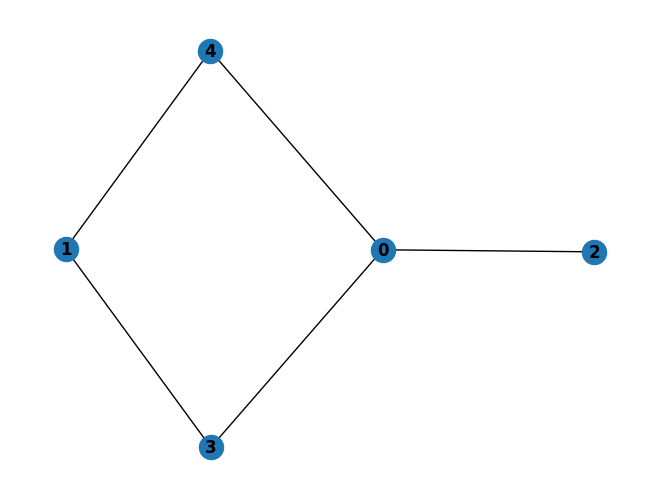

In [16]:
G = nx.Graph()  # создаём объект графа

# определяем список узлов (ID узлов)
nodes1 = np.arange(0, size_matrix, 1)
print(*edges, sep="\n")

# определяем список рёбер
# список кортежей, каждый из которых представляет ребро
# кортеж (id_1, id_2) означает, что узлы id_1 и id_2 соединены ребром
edges1 = []
for i in range(size_matrix):
    for j in range(i, size_matrix):
        if edges[i][j] == 1:
            edges1.append([i, j])

# добавляем информацию в объект графа
G.add_nodes_from(nodes1)
G.add_edges_from(edges1)

# рисуем граф и отображаем его
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

### MAX-CUT SOLUTION

In [20]:
def max_cut_solution(QUBO_matrix):
    b = 0
    x_vectors = np.array(list(itertools.product([0, 1], repeat = QUBO_matrix.shape[0])))
    for x_vector in x_vectors:
        y = np.dot(np.dot(x_vector, QUBO_matrix), x_vector.T)
        if y < b:
            b = y
            solution = x_vector
    return solution

In [21]:
max_cut_solution(edges)

array([0, 0, 1, 1, 1])

### SIMCIM SOLUTION

In [22]:
simcim_max_cut_solution = QUBO_module.QUBO_optimizer()
simcim_max_cut_solution.optimize(edges)

c:\Users\79179\Desktop\шк\Skoltech\Industrial Immersion\Practice_codes\QUBO_module.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.J = torch.tensor(J, dtype=self.dtypef, device=self.device) / self.norm
c:\Users\79179\Desktop\шк\Skoltech\Industrial Immersion\Practice_codes\QUBO_module.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.b = torch.tensor(b, dtype=self.dtypef, device=self.device) / self.norm


[0, 0, 1, 1, 1]

***

## SUM OF SUBSET EQUALS ZERO

### Make simulation of subsets

In [98]:
def make_subsets(size_set):
    # CALCULATION OF S * ST
    myset1 = np.array([[randint(-10, 10) for i in range(size_set)],])
    myset2 = np.transpose(myset1)

    matrix =  np.dot(myset2, myset1) # необязательно добавлять (-np.diag(myset1[0] ** 2))
    print(myset1)
    print(matrix)
    return myset1, matrix

In [99]:
size_set = 15
myset1, subset_QUBO_matrix = make_subsets(size_set)

[[10 -8  5  8  9 -4 -4  1 -7 -2 10 -4  0 -6  9]]
[[100 -80  50  80  90 -40 -40  10 -70 -20 100 -40   0 -60  90]
 [-80  64 -40 -64 -72  32  32  -8  56  16 -80  32   0  48 -72]
 [ 50 -40  25  40  45 -20 -20   5 -35 -10  50 -20   0 -30  45]
 [ 80 -64  40  64  72 -32 -32   8 -56 -16  80 -32   0 -48  72]
 [ 90 -72  45  72  81 -36 -36   9 -63 -18  90 -36   0 -54  81]
 [-40  32 -20 -32 -36  16  16  -4  28   8 -40  16   0  24 -36]
 [-40  32 -20 -32 -36  16  16  -4  28   8 -40  16   0  24 -36]
 [ 10  -8   5   8   9  -4  -4   1  -7  -2  10  -4   0  -6   9]
 [-70  56 -35 -56 -63  28  28  -7  49  14 -70  28   0  42 -63]
 [-20  16 -10 -16 -18   8   8  -2  14   4 -20   8   0  12 -18]
 [100 -80  50  80  90 -40 -40  10 -70 -20 100 -40   0 -60  90]
 [-40  32 -20 -32 -36  16  16  -4  28   8 -40  16   0  24 -36]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [-60  48 -30 -48 -54  24  24  -6  42  12 -60  24   0  36 -54]
 [ 90 -72  45  72  81 -36 -36   9 -63 -18  90 -36   0 -54  81]]


### SUM_OF_SUBSET SOLUTION

In [100]:
def solution(QUBO_matrix):
    x_vectors = np.array(list(itertools.product([0, 1], repeat = QUBO_matrix.shape[0])))
    b = 10 ** 6
    for x_vector in x_vectors:
        y = np.dot(np.dot(x_vector, QUBO_matrix), x_vector.T)
        if y <= b:
            b = y
            solution1 = x_vector
    return solution1

print(myset1)
print(solution(subset_QUBO_matrix))

[[10 -8  5  8  9 -4 -4  1 -7 -2 10 -4  0 -6  9]]
[1 1 1 1 1 1 1 1 1 0 0 1 1 1 0]


### SIMCIM SOLUTION

In [101]:
Subset_problem = QUBO_module.QUBO_optimizer()
Subset_problem.optimize(subset_QUBO_matrix)

c:\Users\79179\Desktop\шк\Skoltech\Industrial Immersion\Practice_codes\QUBO_module.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.J = torch.tensor(J, dtype=self.dtypef, device=self.device) / self.norm
c:\Users\79179\Desktop\шк\Skoltech\Industrial Immersion\Practice_codes\QUBO_module.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.b = torch.tensor(b, dtype=self.dtypef, device=self.device) / self.norm


[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]

***

## MINIMUM VERTEX COVER (MVC) PROBLEM

### Make simulation of edges

In [122]:
def make_edges_MVC(size_matrix, P):
    edges_MVC = [[P * randint(0, 1) if i != j else 0 for j in range(size_matrix)] for i in range(size_matrix)]
    for i in range(size_matrix):
        edges_MVC[i][i] = 1 - 2 * sum(edges_MVC[i])
        for j in range(i, size_matrix):
            edges_MVC[j][i] = edges_MVC[i][j]
    print(*edges_MVC, sep="\n")
    return np.array(edges_MVC)

In [123]:
size_matrix = 5
P = 5
edges_MVC = make_edges_MVC(size_matrix, P)

[-19, 0, 5, 5, 0]
[0, -19, 5, 0, 5]
[5, 5, -29, 0, 5]
[5, 0, 0, -9, 0]
[0, 5, 5, 0, -19]


### Visualization of Graphs

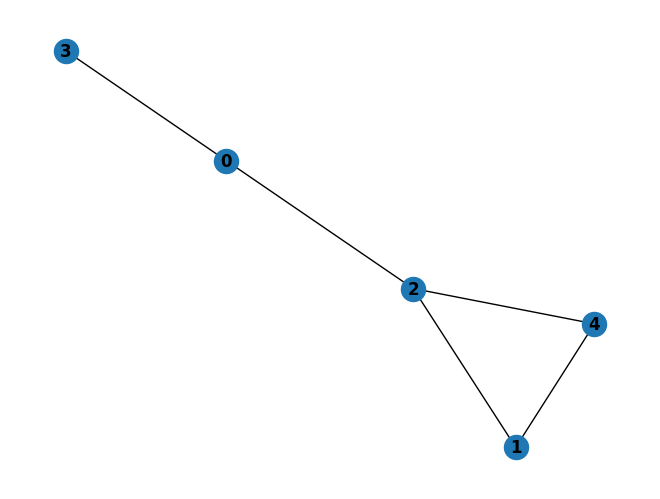

In [124]:
G = nx.Graph()  # создаём объект графа

# определяем список узлов (ID узлов)
nodes1 = np.arange(0, size_matrix, 1)

# определяем список рёбер
# список кортежей, каждый из которых представляет ребро
# кортеж (id_1, id_2) означает, что узлы id_1 и id_2 соединены ребром
edges1 = []
for i in range(size_matrix):
    for j in range(i, size_matrix):
        if  i != j and edges_MVC[i][j] == P:
            edges1.append([i, j])

# добавляем информацию в объект графа
G.add_nodes_from(nodes1)
G.add_edges_from(edges1)

# рисуем граф и отображаем его
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

### MVC Solution

In [125]:
def solution(QUBO_matrix, P):
    x_vectors = np.array(list(itertools.product([0, 1], repeat = np.array(QUBO_matrix).shape[0])))
    b = 10 ** 6
    for x_vector in x_vectors:
        y = (np.array(QUBO_matrix).shape[0] + 1)*2*P + np.dot(np.dot(x_vector, QUBO_matrix), x_vector.T)
        if y <= b:
            b = y
            solution1 = x_vector
        #print(y)
    return solution1
print(solution(edges_MVC, P))

[1 1 1 0 0]


### SIMCIM Solution

In [129]:
MVC_problem = QUBO_module.QUBO_optimizer()
MVC_problem.optimize(edges_MVC)

[1, 0, 1, 0, 1]

***

## GRAPH COLORING

In [6]:
def make_edges_GC(size_matrix, nodes, num_colors, P, P_nodes, P_colors):
    # ADJACENCY MATRIX
    edges_GC = [[randint(0, 1) if i != j else 0 for j in range(nodes)] for i in range(nodes)]
    for i in range(nodes):
        edges_GC[i][i] = 1
        for j in range(i, nodes):
            edges_GC[j][i] = edges_GC[i][j]
    print(*edges_GC, sep='\n')

    # DIAGONAL MATRIX
    edges_GC_diag = []
    edges_GC_diag = np.diag(np.diag(edges_GC))

    # OFF-DIAGONAL MATRIX
    edges_GC_offdiag = []
    edges_GC_offdiag = np.array(edges_GC) - np.array(edges_GC_diag)

    # COLOR PENALTIES
    col_penal_matrix = [[-P_colors if i == j else P_colors for j in range(num_colors)] for i in range(num_colors)]

    # NODES PENALTIES
    nodes_penal_matrix = [[P_nodes if i == j else 0 for j in range(num_colors)] for i in range(num_colors)]

    # BUILDING CONNECTION MATRICES
    matrix1 = np.array(np.kron(edges_GC_diag, col_penal_matrix))
    matrix2 = np.array(np.kron(edges_GC_offdiag, nodes_penal_matrix))
    matrix_sum = matrix1+matrix2

    return matrix_sum, np.array(edges_GC)

In [7]:
num_colors = 3
nodes = 5
size_matrix = nodes
P = 1
P_nodes = 2
P_colors = 4
GC_QUBO_matrix, edges_GC = make_edges_GC(size_matrix, nodes, num_colors, P, P_nodes, P_colors)

[1, 1, 1, 0, 0]
[1, 1, 1, 0, 1]
[1, 1, 1, 1, 1]
[0, 0, 1, 1, 0]
[0, 1, 1, 0, 1]


### Visualization of Graphs

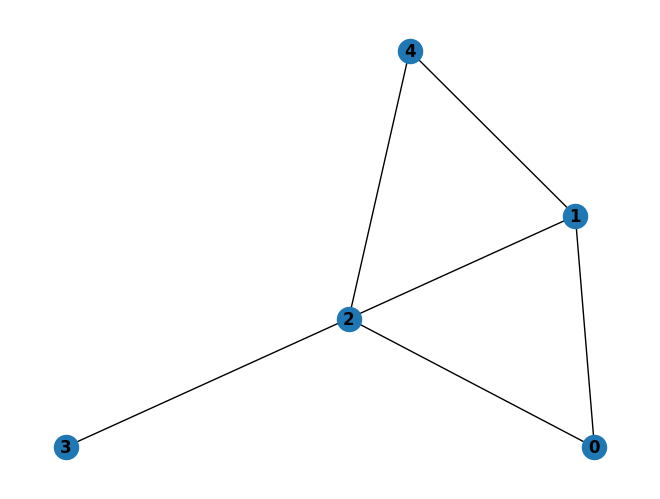

In [8]:
G = nx.Graph()  # создаём объект графа

# определяем список узлов (ID узлов)
nodes1 = np.arange(0, size_matrix, 1)

# определяем список рёбер
# список кортежей, каждый из которых представляет ребро, кортеж (id_1, id_2) означает, что узлы id_1 и id_2 соединены ребром
edges1 = []
for i in range(size_matrix):
    for j in range(i, size_matrix):
        if  i != j and edges_GC[i][j] == P:
            edges1.append([i, j])

# добавляем информацию в объект графа
G.add_nodes_from(nodes1)
G.add_edges_from(edges1)

# рисуем граф и отображаем его
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

### Graph Coloring Solution

In [9]:
print(*GC_QUBO_matrix, sep="\n")
def solution(QUBO):
    x_vectors = np.array(list(itertools.product([0, 1], repeat = np.array(QUBO).shape[0])))
    b = 10 ** 6
    for x_vector in x_vectors:
        y = np.dot(np.dot(x_vector, QUBO), x_vector.T)
        if y <= b:
            b = y
            solution1 = x_vector
    return solution1

print(solution(GC_QUBO_matrix))

def nodes_colors(matrix, size_nodes):
    dict1 = {}
    count = 0
    for i in range(size_nodes):
        t = count + 3
        for j in range(count, t):
            if matrix[j] == 1:
                dict1.setdefault(j-count, []).append(i)
        count += 3
    return dict1

print(nodes_colors(solution(GC_QUBO_matrix), nodes))


[-4  4  4  2  0  0  2  0  0  0  0  0  0  0  0]
[ 4 -4  4  0  2  0  0  2  0  0  0  0  0  0  0]
[ 4  4 -4  0  0  2  0  0  2  0  0  0  0  0  0]
[ 2  0  0 -4  4  4  2  0  0  0  0  0  2  0  0]
[ 0  2  0  4 -4  4  0  2  0  0  0  0  0  2  0]
[ 0  0  2  4  4 -4  0  0  2  0  0  0  0  0  2]
[ 2  0  0  2  0  0 -4  4  4  2  0  0  2  0  0]
[ 0  2  0  0  2  0  4 -4  4  0  2  0  0  2  0]
[ 0  0  2  0  0  2  4  4 -4  0  0  2  0  0  2]
[ 0  0  0  0  0  0  2  0  0 -4  4  4  0  0  0]
[ 0  0  0  0  0  0  0  2  0  4 -4  4  0  0  0]
[ 0  0  0  0  0  0  0  0  2  4  4 -4  0  0  0]
[ 0  0  0  2  0  0  2  0  0  0  0  0 -4  4  4]
[ 0  0  0  0  2  0  0  2  0  0  0  0  4 -4  4]
[ 0  0  0  0  0  2  0  0  2  0  0  0  4  4 -4]
[1 0 0 0 1 0 0 0 1 1 0 0 1 0 0]
{0: [0, 3, 4], 1: [1], 2: [2]}


### SIMCIM Solution

In [12]:
GC_problem = QUBO_module.QUBO_optimizer()
GC_solution = GC_problem.optimize(GC_QUBO_matrix)

c:\Users\79179\Desktop\шк\Skoltech\Industrial Immersion\Practice_codes\QUBO_module.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.J = torch.tensor(J, dtype=self.dtypef, device=self.device) / self.norm
c:\Users\79179\Desktop\шк\Skoltech\Industrial Immersion\Practice_codes\QUBO_module.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.b = torch.tensor(b, dtype=self.dtypef, device=self.device) / self.norm


In [14]:
print(nodes_colors(GC_solution, nodes))

{1: [0, 4], 2: [1, 3], 0: [2]}


***